# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 06:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 06:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [3]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [4]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)
 
assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

current predict:  [14.6888626  17.0562176  17.46908602 13.05516343 12.23041882 14.72882928
 20.5698629  14.99843536 24.91540433 11.40148169 20.74193814 15.90168914
  8.43923109  9.28564991 13.36860785 19.45784895 12.41750513 13.66238774
 12.10710051 22.23196601  7.96680507 20.40525799 11.41337009 14.34499032
 15.13043703 13.79666155 15.38303179 23.43097126 12.47602981 22.36688227
 13.17213897 12.42745545 14.34346188 18.24660931 10.06756441 10.35240985
 14.57755688 17.68244628  9.53737827 13.03760517 12.73711289 11.98385727
 12.84510563 11.65525568 14.45710922 14.83086777 12.48167424 15.85639901
 15.11555097 12.80791895 17.92442216 15.10781124 20.7000849  18.72702755
 12.69013857 12.0230207  15.84458366 10.00622214  4.10184171  8.93416343
 14.71837336 17.01009581 15.90085185 11.71154951 15.21300674 20.42721926
 10.63656819 18.58251951 20.09348951 14.56109223 12.62938569 12.09415017
 11.4873336  17.19560617 13.21264884 23.1111578   8.25170462 15.05475217
 14.67864398 12.66323316 18.74171

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: 
* **StochasticDescent**:
* **MomentumDescent**:
* **Adagrad**:
* **LinearRegression**:

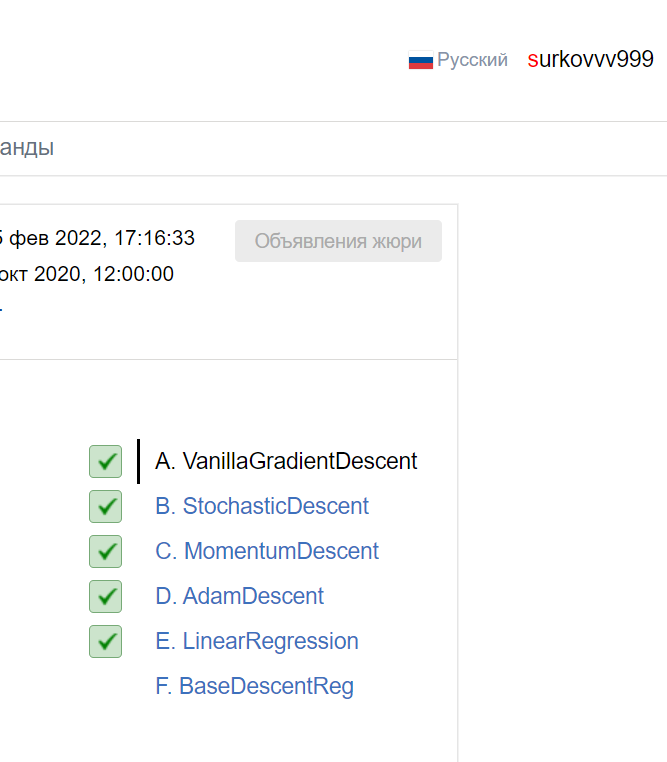

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [9]:
# YOUR CODE:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('auto.csv')

In [10]:
df.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000


In [11]:
df.fuelType.unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [12]:
df = df.drop(index = df[df['fuelType'].apply(lambda x : x in ['lpg', 'andere', 'hybrid', 'cng', 'elektro'])].index)

(array([1.92153e+05, 3.66130e+04, 9.90400e+03, 2.80900e+03, 9.99000e+02,
        4.37000e+02, 2.69000e+02, 1.17000e+02, 7.30000e+01, 4.80000e+01]),
 array([1.00000e+00, 1.00008e+04, 2.00006e+04, 3.00004e+04, 4.00002e+04,
        5.00000e+04, 5.99998e+04, 6.99996e+04, 7.99994e+04, 8.99992e+04,
        9.99990e+04]),
 <BarContainer object of 10 artists>)

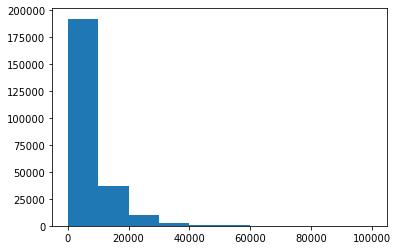

In [13]:
plt.hist(df['price'])

In [14]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [15]:
df['price'] = np.log1p(df['price'])

(array([2.9200e+02, 1.8000e+01, 8.4000e+01, 9.7100e+02, 5.4410e+03,
        4.0584e+04, 7.0660e+04, 8.0667e+04, 4.1172e+04, 3.5330e+03]),
 array([ 0.69314718,  1.77512501,  2.85710284,  3.93908067,  5.02105849,
         6.10303632,  7.18501415,  8.26699198,  9.34896981, 10.43094764,
        11.51292546]),
 <BarContainer object of 10 artists>)

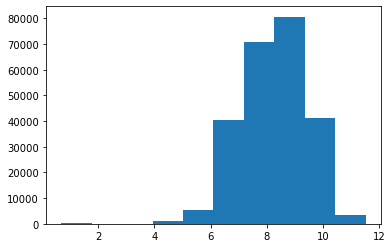

In [16]:
plt.hist(df['price'])

In [17]:
mask = (df['price'] > np.quantile(df['price'], 0.0015))
df = df[mask]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price', 'postalCode', 'dateCreated', 
                                                             'lastSeen', 'model', 'vehicleType', 'gearbox', 'fuelType'], axis = 1),
                                                   df['price'], 
                                                   train_size = 0.6, 
                                                   random_state = 10)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5, random_state = 10)

In [19]:
X_val.sample(5)

,brand,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration
136577,volkswagen,nein,60,150000,2001,0
24043,mercedes_benz,nein,90,150000,2000,12
105782,bmw,nein,105,150000,1999,3
64530,renault,nein,88,125000,2006,3
122935,alfa_romeo,nein,120,20000,2010,10


In [20]:
X_val.isna().notRepairedDamage.unique() # проверка на NaN(вручную перебрал колонки)

array([False])

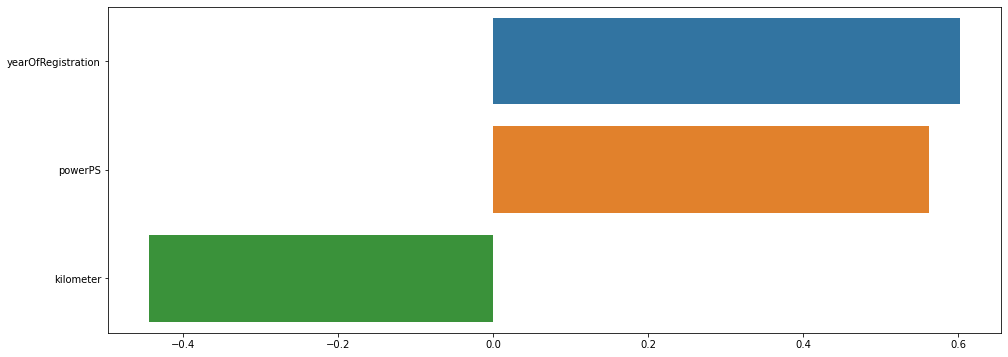

In [21]:
numeric_data = X_val.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

#X_train = X_train.fillna(numeric_data_mean)
#X_test = X_test.fillna(numeric_data_mean)
#X_val = X_val.fillna(numeric_data_mean)

#correlations = X_val[numeric_features].corrwith(y_val).sort_values(ascending=False)
correlations = df.drop(
    columns = ['monthOfRegistration', 'dateCreated', 'lastSeen', 'postalCode', 'price']).corrwith(df['price']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(16, 6)

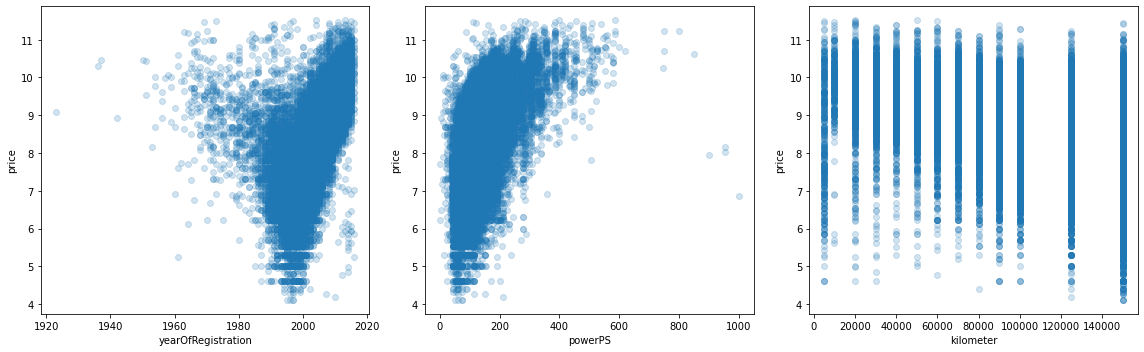

In [22]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["yearOfRegistration", "powerPS", "kilometer"]):
    axs[i].scatter(X_val[feature], y_val, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("price")
plt.tight_layout()

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lambda_ = 1e-2
max_iter = 100
tolerance = 1e-3

numeric = ['powerPS', 'kilometer', 'yearOfRegistration', 'monthOfRegistration']
categorical = ['brand','notRepairedDamage']

column_transformer = ColumnTransformer([
    #('LE', LabelEncoder(), categorical),
    #('ohe', OneHotEncoder(handle_unknown="ignore"), ['notRepairedDamage']),
    ('scaling', StandardScaler(), numeric)
])

X_val_transformed = column_transformer.fit_transform(X_val)
X_train_transformed = column_transformer.transform(X_train)
X_test_transformed = column_transformer.transform(X_test)
w0 = np.zeros(X_test_transformed.shape[1])

In [24]:
X_val_transformed.shape

(48606, 4)

In [29]:
lambdas = np.logspace(-3, 2, 20)

def find_best_lambda(descent):
    best_lambda = 10
    best_MSE = 6e6
    for lambdas_ in lambdas:
        regression = LinearRegression(
        descent = GradientDescent(lambda_ = lambda_, w0 = w0),
        tolerance = tolerance,
        max_iter = max_iter
    )
    print("Loss:", descent.loss_hitory)
    

array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02])

In [46]:
lambdas = np.logspace(-6, 1, 20)

best_lambda_GD = 10
best_MSE = 6e6

#print(y_val.values)
for lambda_ in lambdas:
    regression1 = LinearRegression(
        descent = GradientDescent(lambda_ = lambda_, w0 = w0),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression1.fit(X_val_transformed, y_val)
    #print("Loss history: ", regression1.loss_history)
    predict = regression1.predict(X_test_transformed)
    #print("Current MSE: ", mean_squared_error(y_test, predict))
    if mean_squared_error(y_test, predict) < best_MSE:
        best_lambda_GD = lambda_
        best_MSE = mean_squared_error(y_val, predict)
    #else:
    #    break
print("Best GD's MSE: %.4f" % best_MSE)
print("Best GD's lambda : %.4f" % best_lambda_GD)

[8.97474461 5.30330491 8.90937041 ... 6.74641213 9.73512807 4.79579055]
breaking...
Current MSE:  1.3674196756765902
breaking...
Current MSE:  1.367412779820016
breaking...
Current MSE:  1.3673966731329457
breaking...
Current MSE:  1.3673590530156188
breaking...
Current MSE:  1.3672711862685105
breaking...
Current MSE:  1.3670659723985965
breaking...
Current MSE:  1.3665867502183136
breaking...
Current MSE:  1.3654679676690948
breaking...
Current MSE:  1.3628577873821492
breaking...
Current MSE:  1.3567774134654669
breaking...
Current MSE:  1.34266417183908
breaking...
Current MSE:  1.3101841268690808
breaking...
Current MSE:  1.0540748549246595
breaking...
Current MSE:  0.6899341760958905
breaking...
Current MSE:  0.5494659455783556
breaking...
Current MSE:  0.547875691997059
breaking...
Current MSE:  0.5507308065677596
breaking...
Current MSE:  0.550434084250307
breaking...
Current MSE:  0.5512812767735803
Current MSE:  9.395175553233078e+112
Best GD's MSE: 0.5479
Best GD's lambda : 

In [48]:
best_lambda_SGD = 10000
best_MSE = 6e6

for lambda_ in lambdas:
    regression2 = LinearRegression(
        descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 32),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression2.fit(np.array(X_val_transformed), np.array(y_val))
    #print(regression2.loss_history)
    if regression2.loss_history[-1] < best_MSE:
        best_lambda_SGD = lambda_
        best_MSE = regression2.loss_history[-1]
    else:
        break
print("Best SGD's MSE: %.4f" % best_MSE)
print("Best SGD's lambda : %.4f" % best_lambda_SGD)

breaking...
breaking...
breaking...
Best SGD's MSE: 69.1911
Best SGD's lambda : 0.0000


In [49]:
best_lambda_MD = 10000
best_MSE = 6e6

for lambda_ in lambdas:
    regression3 = LinearRegression(
        descent = MomentumDescent(lambda_ = lambda_, w0 = w0),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression3.fit(np.array(X_val_transformed), np.array(y_val))
    #print(regression3.loss_history)
    if regression3.loss_history[-1] < best_MSE:
        best_lambda_MD = lambda_
        best_MSE = regression3.loss_history[-1]
    else:
        break
print("Best MD's MSE: %.4f" % best_MSE)
print("Best MD's lambda : %.4f" % best_lambda_MD)

breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
Best MD's MSE: 68.3898
Best MD's lambda : 0.3360


In [50]:
best_lambda_Adagrad = 10000
best_MSE = 6e6

for lambda_ in lambdas:
    regression4 = LinearRegression(
        descent = Adagrad(lambda_ = lambda_, w0 = w0),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression4.fit(np.array(X_val_transformed), np.array(y_val))
    #print(regression4.loss_history)
    if regression4.loss_history[-1] < best_MSE:
        best_lambda_Adagrad = lambda_
        best_MSE = regression4.loss_history[-1]
    else:
        break
print("Best Adagrad MSE: %.4f" % best_MSE)
print("Best Adagrad lambda : %.4f" % best_lambda_Adagrad)

breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
breaking...
Best Adagrad MSE: 68.3901
Best Adagrad lambda : 0.7848


In [2]:
regression1 = LinearRegression(
        descent = GradientDescent(lambda_ = best_lambda_GD, w0 = w0),
        tolerance = tolerance,
        max_iter = max_iter
    )

regression2 = LinearRegression(
        descent = StochasticDescent(lambda_ = best_lambda_SGD, w0 = w0, batch_size = 6),
        tolerance = tolerance,
        max_iter = max_iter
    )

regression3 = LinearRegression(
        descent = MomentumDescent(lambda_ = best_lambda_MD, w0 = w0),
        tolerance = tolerance,
        max_iter = max_iter
    )

regression4 = LinearRegression(
        descent = Adagrad(lambda_ = best_lambda_Adagrad, w0 = w0),
        tolerance = tolerance,
        max_iter = max_iter
    )

NameError: name 'LinearRegression' is not defined

In [1]:
regression1.fit(X_train_transformed, y_train)
y_pred_GD = regression1.predict(X_test_transformed)
print("Test MSE GD = %.4f" % mean_squared_error(y_test, y_pred_GD))
print("Test R2 GD = %.4f" % r2_score(y_test, y_pred_GD))

regression2.fit(np.array(X_train_transformed), np.array(y_train))
y_pred_SGD = regression2.predict(np.array(X_test_transformed))
print("Test MSE SGD = %.4f" % mean_squared_error(y_test, y_pred_SGD))
print("Test R2 SGD = %.4f" % r2_score(y_test, y_pred_SGD))

regression3.fit(X_train_transformed, y_train)
y_pred_MD = regression3.predict(X_test_transformed)
print("Test MSE Momentum Descent = %.4f" % mean_squared_error(y_test, y_pred_MD))
print("Test R2 Momentum Descent = %.4f" % r2_score(y_test, y_pred_MD))

regression4.fit(X_train_transformed, y_train)
y_pred_Ad = regression4.predict(X_test_transformed)
print("Test MSE Adagrad = %.4f" % mean_squared_error(y_test, y_pred_Ad))
print("Test R2 Adagrad = %.4f" % r2_score(y_test, y_pred_Ad))

NameError: name 'regression1' is not defined

<AxesSubplot:>

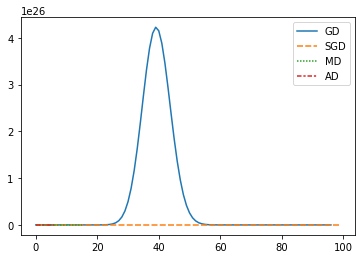

In [36]:
# значение функции ошибки от номера итерации (все 4 на одном графике)
test = {"GD" : regression1.loss_history,
        "SGD" : regression2.loss_history,
        "MD" : regression3.loss_history,
        "AD" : regression4.loss_history}

sns.lineplot(data = test)

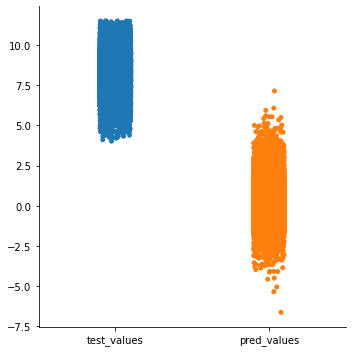

In [37]:
GD_test = pd.DataFrame({"test_values" : y_test,
                       "pred_values" : y_pred_GD})
sns.catplot(data = GD_test)

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [38]:
import time
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
size_time_mean = {}
size_iter_mean = {}
size_time_var = {}
size_iter_var = {}
k = 5

for batch_size in batch_sizes:
    times = []
    iterations = []
    regression = LinearRegression(
            descent = StochasticDescent(lambda_ = best_lambda_SGD, w0 = w0, batch_size = batch_size),
            tolerance = 0.0005,
            max_iter = 20
        )
    for i in range(k):
        t0 = time.time()
        regression.fit(np.array(X_train_transformed), np.array(y_train))
        t1 = time.time()
        times.append(t1 - t0)
        iterations.append(regression.amount_of_steps)
    size_time_mean[batch_size] = np.mean(times)
    size_iter_mean[batch_size] = np.mean(iterations)
    size_time_var[batch_size] = np.var(times)
    size_iter_var[batch_size] = np.var(iterations)


current predict:  [ 4.6400277  15.3337378  -9.26119689 ... -8.28606077 -7.5007881
  3.78698021]
current predict:  [  3.29117915  15.16835531 -11.46646271 ...  -9.99487559 -10.93376336
   3.43113902]
current predict:  [  2.69528315  14.3721261  -11.66642041 ...  -9.97302098 -11.71763296
   3.34379657]
current predict:  [  2.44221523  15.0063961  -12.32361037 ... -10.89049156 -12.52662106
   2.91080954]
current predict:  [  2.78328195  15.64155276 -11.38769712 ... -10.33410223 -11.99422785
   3.1515749 ]
current predict:  [  1.83366469  14.09032066 -11.34649186 ... -10.47527448 -12.08156303
   2.16442782]
current predict:  [  2.15443016  13.72547122  -9.98952044 ...  -9.31530231 -10.78227279
   2.40251606]
current predict:  [  2.16989086  13.51546093  -9.54716493 ...  -8.81844596 -10.65418943
   2.64731744]
current predict:  [ 2.32487135 12.22043691 -8.19814434 ... -7.01925985 -9.7103723
  3.47324037]
current predict:  [ 2.59661853  9.17602172 -4.23254883 ... -3.16843557 -5.89177479
  3.

AttributeError: 'LinearRegression' object has no attribute 'amount_of_steps'

In [ ]:
sns.lineplot(data = size_iter_mean)

In [ ]:
sns.lineplot(data = size_time_mean)

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [ ]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

# YOUR CODE:

In [ ]:
mues = np.logspace(-2, 3, 20)

best_mu_GDR = 10000
best_MSE = 6e6

for mu_ in mues:
    regression5 = LinearRegression(
        descent = GradientDescentReg(lambda_ = best_lambda_GD, w0 = w0, mu = mu_),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression5.fit(X_val_transformed, y_val)
    #print(regression5.loss_history)
    if regression5.loss_history[-1] < best_MSE:
        best_mu_GDR = mu_
        best_MSE = regression5.loss_history[-1]
    else:
        break
print("Best GDR's MSE: %.4f" % best_MSE)
print("Best GDR's lambda : %.4f" % best_mu_GDR)

In [ ]:
best_mu_SGDR = 10000
best_MSE = 6e6

for mu_ in mues:
    regression6 = LinearRegression(
        descent = StochasticDescentReg(lambda_ = best_lambda_SGD, w0 = w0, batch_size = 50, mu = mu_),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression6.fit(np.array(X_val_transformed), np.array(y_val))
    #print(regression6.loss_history)
    if regression6.loss_history[-1] < best_MSE:
        best_mu_SGDR = mu_
        best_MSE = regression6.loss_history[-1]
    else:
        break
print("Best SGDR's MSE: %.4f" % best_MSE)
print("Best SGDR's mu : %.4f" % best_mu_SGDR)

In [ ]:
best_mu_MDR = 10000
best_MSE = 6e6

for mu_ in mues:
    regression7 = LinearRegression(
        descent = MomentumDescentReg(lambda_ = best_lambda_MD, w0 = w0, mu = mu_),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression7.fit(np.array(X_val_transformed), np.array(y_val))
    #print(regression7.loss_history)
    if regression7.loss_history[-1] < best_MSE:
        best_mu_MDR = mu_
        best_MSE = regression7.loss_history[-1]
    else:
        break
print("Best MDR's MSE: %.4f" % best_MSE)
print("Best MDR's mu : %.4f" % best_mu_MDR)

In [ ]:
best_mu_AdR = 10000
best_MSE = 6e6

for mu_ in mues:
    regression8 = LinearRegression(
        descent = AdagradReg(lambda_ = best_lambda_Adagrad, w0 = w0, mu = mu_),
        tolerance = tolerance,
        max_iter = max_iter
    )
    regression8.fit(np.array(X_val_transformed), np.array(y_val))
    #print(regression8.loss_history)
    if regression8.loss_history[-1] < best_MSE:
        best_mu_AdR = mu_
        best_MSE = regression8.loss_history[-1]
    else:
        break
print("Best AdR's MSE: %.4f" % best_MSE)
print("Best AdR's mu : %.4f" % best_mu_AdR)

In [ ]:
regression5 = LinearRegression(
        descent = GradientDescentReg(lambda_ = best_lambda_GD, w0 = w0, mu = best_mu_GDR),
        tolerance = tolerance,
        max_iter = max_iter
    )

regression6 = LinearRegression(
        descent = StochasticDescentReg(lambda_ = best_lambda_SGD, w0 = w0, batch_size = 50, mu = best_mu_SGDR),
        tolerance = tolerance,
        max_iter = max_iter
    )

regression7 = LinearRegression(
        descent = MomentumDescentReg(lambda_ = best_lambda_MD, w0 = w0, mu = best_mu_MDR),
        tolerance = tolerance,
        max_iter = max_iter
    )

regression8 = LinearRegression(
        descent = AdagradReg(lambda_ = best_lambda_Adagrad, w0 = w0, mu = best_mu_AdR),
        tolerance = tolerance,
        max_iter = max_iter
    )

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

SKL_LM = LinearRegression()
SKL_LM.fit(X_train_transformed, y_train)
y_skpred = SKL_LM.predict(X_test_transformed)
print("Test MSE GDR from sklearn = %.4f" % mean_squared_error(y_test, y_skpred))

In [ ]:
regression5.fit(X_train_transformed, y_train)
y_pred_GDR = regression5.predict(X_test_transformed)
print("Test MSE GDR = %.4f" % mean_squared_error(y_test, y_pred_GDR))
print("Test R2 GDR = %.4f" % r2_score(y_test, y_pred_GDR))

regression6.fit(np.array(X_train_transformed), np.array(y_train))
y_pred_SGDR = regression6.predict(np.array(X_test_transformed))
print("Test MSE SGDR = %.4f" % mean_squared_error(y_test, y_pred_SGDR))
print("Test R2 SGDR = %.4f" % r2_score(y_test, y_pred_SGDR))

regression7.fit(X_train_transformed, y_train)
y_pred_MDR = regression7.predict(X_test_transformed)
print("Test MSE MDR = %.4f" % mean_squared_error(y_test, y_pred_MDR))
print("Test R2 MDR = %.4f" % r2_score(y_test, y_pred_MDR))

regression8.fit(X_train_transformed, y_train)
y_pred_AdR = regression8.predict(X_test_transformed)
print("Test MSE AdR = %.4f" % mean_squared_error(y_test, y_pred_AdR))
print("Test R2 AdR = %.4f" % r2_score(y_test, y_pred_AdR))

In [ ]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

test1 = pd.DataFrame({"GD" : np.around(regression1.loss_history, decimals = 4),
        "GDR" : np.around(regression5.loss_history, decimals = 4)})
test2 = pd.DataFrame({"SGD" : np.around(regression2.loss_history, decimals = 4),
        "SGDR" : np.around(regression6.loss_history, decimals = 4)})
test3 = pd.DataFrame({"MD" : np.around(regression3.loss_history, decimals = 4),
        "MDR" : np.around(regression7.loss_history, decimals = 4)})
test4 = pd.DataFrame({"Ad" : np.around(regression4.loss_history, decimals = 4),
        "AdR" : np.around(regression8.loss_history, decimals = 4)})

In [ ]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4)
sns.stripplot(data = test1, ax = ax[0])
sns.stripplot(data = test2, ax = ax[1])
sns.stripplot(data = test3, ax = ax[2])
sns.stripplot(data = test4, ax = ax[3])
fig.show()

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [ ]:
# YOUR CODE:

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.